In [4]:
import matplotlib.pyplot as plt
import csv
import numpy as np

begin, end = 1, 61 # (begin is inclusive, end is exclusive)
time = np.arange(begin, end, 1)

# Class to cleanly save samples
class Sample:
    def __init__(self):
        self.data = {
            'RawEEG': [],
            'Alpha': [],
            'Low Beta': [],
            'High Beta': [],
            'Gamma': [],
            'Theta': [],
            'Delta': [],
            'Meditation': [],
            'Attention': []
        }

    def recordDataPoint(self, RawEEG, Attention, Meditation, Alpha, Delta, Theta, LowBeta, HighBeta, Gamma):
        self.data['RawEEG'].append(float(RawEEG))
        self.data['Attention'].append(float(Attention))
        self.data['Meditation'].append(float(Meditation))
        self.data['Alpha'].append(float(Alpha))
        self.data['Delta'].append(float(Delta))
        self.data['Theta'].append(float(Theta))
        self.data['Low Beta'].append(float(LowBeta))
        self.data['High Beta'].append(float(HighBeta))
        self.data['Gamma'].append(float(Gamma))

    '''
    Record a line of data from the CSV output, which takes form RawEEG, Alpha, Delta, Gamma, Low Beta, High Beta, Theta, Attention, Meditation

    '''
    def recordDataLine(self, line):
        self.recordDataPoint(line[0], line[7], line[8], line[1], line[2], line[6], line[4], line[5], line[3])
    
    def getEEG(self):
        return self.data['RawEEG']
    
    def getAttention(self):
        return self.data["Attention"]
    
    def getMeditation(self):
        return self.data["Meditation"]
    
    def getAlpha(self):
        return self.data["Alpha"]
    
    def getDelta(self):
        return self.data["Delta"]
    
    def getTheta(self):
        return self.data["Theta"]
    
    def getLowBeta(self):
        return self.data["Low Beta"]
    
    def getHighBeta(self):
        return self.data["High Beta"]
    
    def getGamma(self):
        return self.data["Gamma"]

    def get(self, key):
        return self.data[key]

    def getEngagement(self):
        return [20 * (low_beta + high_beta) / (alpha + theta) for low_beta, high_beta, alpha, theta in zip(self.data['Low Beta'], self.data['High Beta'], self.data['Alpha'], self.data['Theta'])]
    

In [5]:
num_samples = {
    1: 10,
    2: 8
}

n_people = len(num_samples)

data = [[] for _ in range(n_people)]
dataLabels = [[] for _ in range(n_people)]

folder = "classifier_v2/data/all_data/"

def transcribeFileToSample(brainState: str, personNum: int, sampleNum: int):

    sampleData = Sample()
    
    with open(f'{folder}/{brainState}_{personNum}_{sampleNum}.csv') as csvFile:
        reader = csv.reader(csvFile)
        header = next(reader)

        for row in reader:
            sampleData.recordDataPoint(row[0], row[7], row[8], row[1], row[2], row[6], row[4], row[5], row[3])
    
    data[personNum - 1].append(sampleData)
    dataLabels[personNum - 1].append(brainState)

for state in ["active", "meditate", "neutral"]:
    for personNum in num_samples:
        for sampleNum in range(1, num_samples[personNum] + 1):
            transcribeFileToSample(state, personNum, sampleNum)

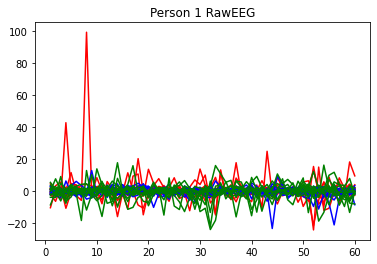

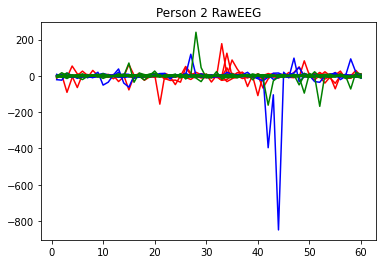

<Figure size 432x288 with 0 Axes>

In [6]:
def plot_feature(feature: str):
    plt.figsize = (10, 10)
    for i in range(n_people):
        # plt.subplot(1, n_people, i + 1)
        plt.title(f"Person {i + 1} {feature}")
        for sample, label in zip(data[i], dataLabels[i]):
            if label == "active":
                plt.plot(time, sample.get(feature), 'r')
            elif label == "neutral":
                plt.plot(time, sample.get(feature), 'g')
            elif label == "meditate":
                plt.plot(time, sample.get(feature), 'b')

        plt.show()
        plt.clf()

plot_feature("RawEEG")

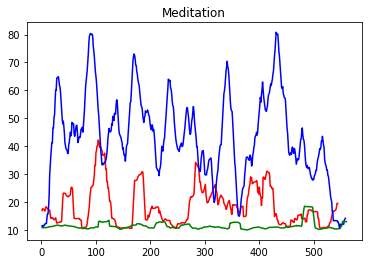

<Figure size 432x288 with 0 Axes>

In [14]:
personNum = "2"
full_data = []

src_folder = f"classifier_v2/data/{personNum}"

def transcribe_full_data(brainState: str):

    sampleData = Sample()
    
    with open(f'{src_folder}/{brainState}.csv') as csvFile:
        reader = csv.reader(csvFile)
        header = next(reader)

        for row in reader:
            sampleData.recordDataPoint(row[0], row[7], row[8], row[1], row[2], row[6], row[4], row[5], row[3])

    full_data.append(sampleData)

for state in ["active", "meditate", "neutral"]:
    transcribe_full_data(state)

def plot_full_data(feature: str):

    #plt.title(f"Person {personNum} {feature}")
    plt.title(f"{feature}")

    for sample, label in zip(full_data, ["active", "meditate", "neutral"]):
        sample_len = len(sample.get(feature))
        time = np.arange(1, sample_len + 1, 1)
        if label == "active":
            plt.plot(time, sample.get(feature), 'r')
        elif label == "neutral":
            plt.plot(time, sample.get(feature), 'g')
        elif label == "meditate":
            plt.plot(time, sample.get(feature), 'b')
    plt.show()
    plt.clf()

plot_full_data("Meditation")